In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-data-analysis/Sales Data.csv


In [2]:
file_path = '/kaggle/input/sales-data-analysis/Sales Data.csv'
data = pd.read_csv(file_path, encoding='latin1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [4]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB
None


In [6]:
print(data.describe())

          Unnamed: 0       Order ID  Quantity Ordered     Price Each  \
count  185950.000000  185950.000000     185950.000000  185950.000000   
mean     8340.388475  230417.569379          1.124383     184.399735   
std      5450.554093   51512.737110          0.442793     332.731330   
min         0.000000  141234.000000          1.000000       2.990000   
25%      3894.000000  185831.250000          1.000000      11.950000   
50%      7786.000000  230367.500000          1.000000      14.950000   
75%     11872.000000  275035.750000          1.000000     150.000000   
max     25116.000000  319670.000000          9.000000    1700.000000   

               Month          Sales           Hour  
count  185950.000000  185950.000000  185950.000000  
mean        7.059140     185.490917      14.413305  
std         3.502996     332.919771       5.423416  
min         1.000000       2.990000       0.000000  
25%         4.000000      11.950000      11.000000  
50%         7.000000      14.9500

In [7]:
for col in data.columns:
    print(f"{col}: {data[col].unique()[:10]}")

Unnamed: 0: [0 1 2 3 4 5 6 7 8 9]
Order ID: [295665 295666 295667 295668 295669 295670 295671 295672 295673 295674]
Product: ['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone']
Quantity Ordered: [1 2 4 3 7 5 6 8 9]
Price Each: [1700.    600.     11.95  149.99    3.84   99.99    2.99  999.99   14.95
   11.99]
Order Date: ['2019-12-30 00:01:00' '2019-12-29 07:03:00' '2019-12-12 18:21:00'
 '2019-12-22 15:13:00' '2019-12-18 12:38:00' '2019-12-31 22:58:00'
 '2019-12-16 15:10:00' '2019-12-13 09:29:00' '2019-12-15 23:26:00'
 '2019-12-28 11:51:00']
Purchase Address: ['136 Church St, New York City, NY 10001'
 '562 2nd St, New York City, NY 10001'
 '277 Main St, New York City, NY 10001'
 '410 6th St, San Francisco, CA 94016' '43 Hill St, Atlanta, GA 30301'
 '200 Jefferson St, New York City, NY 10001'
 '928 12th St, Portland

In [8]:
print(data.isnull().sum())

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [9]:
data.fillna(data.median(numeric_only=True), inplace=True)
data.fillna('Unknown', inplace=True)

In [10]:
## Cleaning and Standardizing data
#Dropping unecessary columns
data= data.drop(['UnwantedColumn1', 'UnwantedColumn2'], axis=1, errors='ignore')

# Standardize text (eg., lowercase product names)
data['Product'] = data['Product'].str.lower()

# Convert dates to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Convert currency colunmns to numeric
data['Sales'] = data['Sales'].replace('[\$,]', '', regex=True).astype(float)

In [12]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

In [13]:
print(data.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    macbook pro laptop                 1     1700.00   
1           1    295666    lg washing machine                 1      600.00   
2           2    295667  usb-c charging cable                 1       11.95   
3           3    295668      27in fhd monitor                 1      149.99   
4           4    295669  usb-c charging cable                 1       11.95   

           Order Date                        Purchase Address  Month    Sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  Year  
0   Ne

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int32         
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
 11  Year              185950 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(3)
memory usage: 15.6+ MB
None


In [15]:
print(data.describe())

          Unnamed: 0       Order ID  Quantity Ordered     Price Each  \
count  185950.000000  185950.000000     185950.000000  185950.000000   
mean     8340.388475  230417.569379          1.124383     184.399735   
min         0.000000  141234.000000          1.000000       2.990000   
25%      3894.000000  185831.250000          1.000000      11.950000   
50%      7786.000000  230367.500000          1.000000      14.950000   
75%     11872.000000  275035.750000          1.000000     150.000000   
max     25116.000000  319670.000000          9.000000    1700.000000   
std      5450.554093   51512.737110          0.442793     332.731330   

                          Order Date          Month          Sales  \
count                         185950  185950.000000  185950.000000   
mean   2019-07-18 21:54:38.887550464       7.059140     185.490917   
min              2019-01-01 03:07:00       1.000000       2.990000   
25%              2019-04-16 21:05:15       4.000000      11.950000   
5

In [21]:
output_path =  '/kaggle/working/Cleaned_Sales_Data.csv'
data.to_csv(output_path, index=False)


print(f"Transformed data saved to {output_path}")

Transformed data saved to /kaggle/working/Cleaned_Sales_Data.csv


In [36]:
# Set threshold for high sales using median of the 'Sales' column
threshold= data['Sales'].median()

# Create a new binary target system 'highSales'
data['HighSales'] = (data["Sales"] > threshold.astype(int))

# Verification of new column
print(data[['Sales', 'HighSales']].head())

print(threshold)

print(data.columns)

     Sales  HighSales
0  1700.00       True
1   600.00       True
2    11.95      False
3   149.99       True
4    11.95      False
14.95
Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'Hour', 'Year',
       'HighSales', 'City_ Austin', 'City_ Boston', 'City_ Dallas',
       'City_ Los Angeles', 'City_ New York City', 'City_ Portland',
       'City_ San Francisco', 'City_ Seattle'],
      dtype='object')


In [32]:
# Select Relevant Features and Target
features = ['Quantity Ordered', 'Price Each', 'Month', 'Hour']
target = 'HighSales'

# Convert categorical feature 'City' into dummy variables
data = pd.get_dummies(data, columns['City'], drop_first=True)

# Add the dummy variables for 'City' to the feature list
features.extend([col for col in data.columns if 'City_' in col])

# Prepare input (X) and output (y) for the model
X = data[features]
y = data[target]

print(f"selected features: {features")

KeyError: "None of [Index(['City'], dtype='object')] are in the [columns]"

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Trainig set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Trainig set size: 148760
Testing set size: 37190


In [29]:
# Using logistic regression model to train on the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initializing the logistic regression model
model = LogisticRegression(max_iter=1000)

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Displaying classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     15601
        True       1.00      1.00      1.00     21589

    accuracy                           1.00     37190
   macro avg       1.00      1.00      1.00     37190
weighted avg       1.00      1.00      1.00     37190



In [30]:
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
print(feature_importance.sort_values(by='Importance', ascending=False))

                Feature  Importance
0      Quantity Ordered   16.820725
1            Price Each    5.065918
11        City_ Seattle    0.097724
7     City_ Los Angeles    0.005198
3                  Hour    0.003821
2                 Month   -0.002566
4          City_ Austin   -0.007365
6          City_ Dallas   -0.015619
10  City_ San Francisco   -0.027427
5          City_ Boston   -0.050272
8   City_ New York City   -0.072031
9        City_ Portland   -0.187436


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

print(data.columns)

Cross-validation accuracy: 1.00 ± 0.00
Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'Hour', 'Year',
       'HighSales', 'City_ Austin', 'City_ Boston', 'City_ Dallas',
       'City_ Los Angeles', 'City_ New York City', 'City_ Portland',
       'City_ San Francisco', 'City_ Seattle'],
      dtype='object')


In [40]:
data = pd.get_dummies(data, columns=['Product'], drop_first=True)
features = ['Hour', 'Month'] + [col for col in data.columns if 'City_' in col or 'Product_' in col]

X = data[features]
y = data['HighSales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Revised Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Revised Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

       False       0.95      1.00      0.98     15601
        True       1.00      0.97      0.98     21589

    accuracy                           0.98     37190
   macro avg       0.98      0.98      0.98     37190
weighted avg       0.98      0.98      0.98     37190



In [42]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

Cross-validation accuracy: 0.98 ± 0.00


In [44]:
importance = model.coef_[0]
feature_importance= pd.DataFrame({'Feature': features, 'Importance': importance})
print(feature_importance.sort_values(by='Importance', ascending=False))

                               Feature  Importance
22    Product_lightning charging cable    2.808592
15    Product_apple airpods headphones    2.727133
16  Product_bose soundsport headphones    2.644711
11            Product_27in fhd monitor    2.186534
19                      Product_iphone    2.114351
10      Product_27in 4k gaming monitor    2.041541
12      Product_34in ultrawide monitor    2.039895
18                Product_google phone    1.950512
17               Product_flatscreen tv    1.861002
23          Product_macbook pro laptop    1.852629
24             Product_thinkpad laptop    1.770829
26             Product_vareebadd phone    1.381595
21          Product_lg washing machine    0.833796
20                    Product_lg dryer    0.821569
3                         City_ Boston    0.203115
4                         City_ Dallas    0.182415
2                         City_ Austin    0.138465
8                  City_ San Francisco    0.112438
9                        City_ 

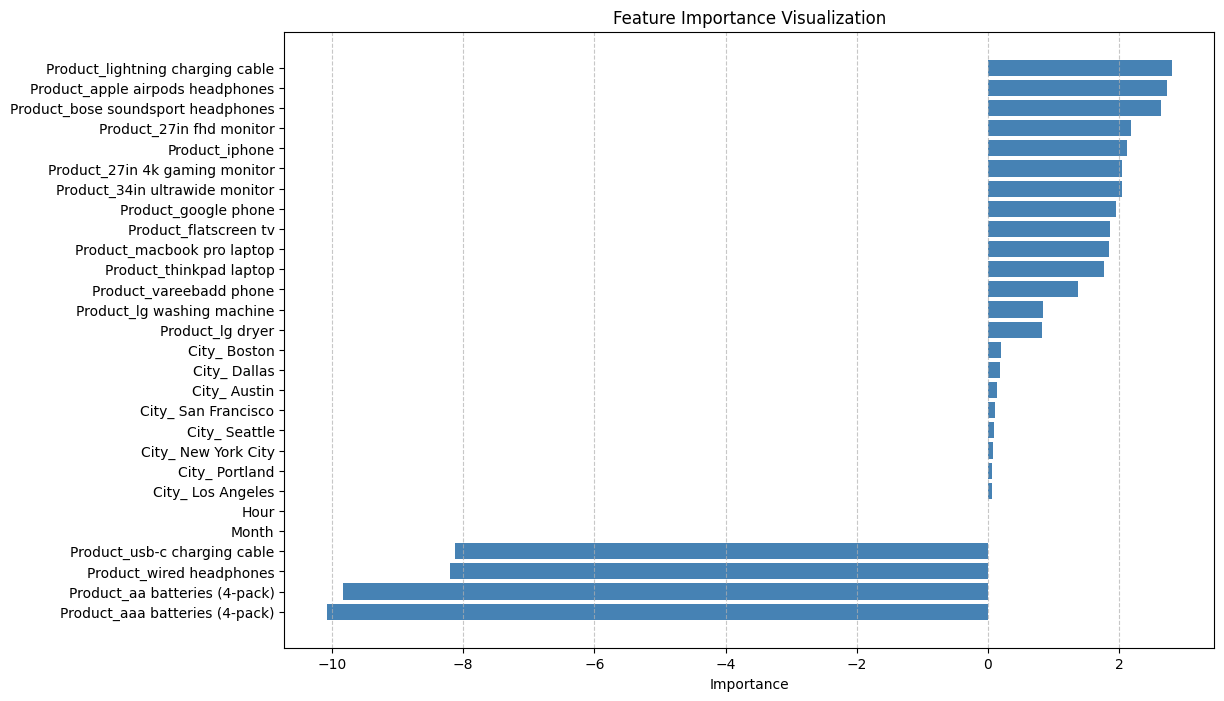

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Feature Importance Visualization')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()